# Categorizing Dynamical Function

Chemical, biological, and mechanical systems can accomplish various functions non-uniformly in time. 
Systems that accomplish these dynamical functions are promising for use in a variety of material contexts. 
Synthetic materials are now being driven out of equilibrium to execute these dynamical functions, transporting matter, outputting work, self-replicating, and self-destroying.
Recent experiments on responsive materials suggest the potential to tune environmental stimuli that speed up or slow down the process. 
However, it is unclear how to balance speed against performance and dissipation of entropy or heat, making it a challenge to optimize the functionality in terms of the associated thermodynamic costs.
One way to overcome this challenge could be to design systems to deliver work or high yield structures on timescales that are shorter than those of dissipative losses.
But, is this type of process possible for a given system?

Taking up this analysis here, we show how to classify dynamical functions based on whether the speed, dissipation, and functional performance can be simultaneously optimized by tuning experimentally controllable parameters like temperature, pH, and potential difference. 
We map the design space of functionality, identifying four distinct optimization modalities, Fig. 1. This categorization enables us to establish a protocol for determining our ability to optimize the performance of models of dynamically functioning systems. 
This protocol shows that in only one mode are there high-performing paths that can occur sufficiently quickly and avoid dissipative losses.

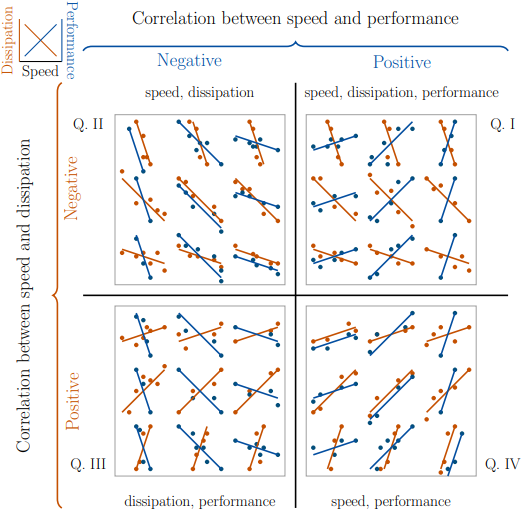


Here, we describe the details of our protocol for assigning the optimization mode of a given dynamical function model.

# Step 1: Input Markov model for dynamical function

To identify the mode of optimization for a dynamical function, we take as input a discrete-state, continuous-time Markov model.
A given model consists of a set of $N$ states $\{x_i\}$ with $i=1,\ldots,N$.
The transition rate between any two states $i$ and $j$ are time-homogeneous, $w(x_i|x_j)$.
The escape rate from a particular state is given by
$w_{x_{i}}=\sum_{j\neq i} w(x_{j} \vert x_{i})$.
The model and parameters provided are taken to be a reasonable starting point for optimization, viz., the parameters represent conditions at which the system accomplishes a function.

# Step 2: Sample or enumerate paths

Most models of dynamical function have natural definitions for starting and ending states, such as unassembled and fully assembled states in a self-assembling system or a starting and ending location for transportation.
Given the initial and final states, different approaches are possible to determine a set of paths for the model.
Paths generated by sampling methods, such as kinetic Monte Carlo.
Explicitly enumerating sequences of states, $\mathcal{C}_{n}: x_{0},x_{1},\ldots,x_{n}$ for a chosen number of state-to-state transitions $n$ between the initial and final states is the other option for path generation that does not involve sampling.

# Step 3: Determine observables and probability of generated paths

Given some set of paths between an initial and final state of a model that accomplishes some function dynamically, the speed, dissipation, performance of that function, and the probability of the path can each be defined along a path.
The speed of a path is accessed by the inverse of the mean occurrence time of a path, given by the sum of the inverse of each escape rate along the path:
$\langle 1 / \tau \rangle_{\mathcal{C}_{n}}:=1 / \langle \tau \rangle_{\mathcal{C}_{n}}:=\frac{1}{\sum_{i=0}^{n} w_{x_{i}}^{-1}}$.
The dissipation is defined by the negative of the entropy flow, given by the log-ratio of the transition rates in the forward and reverse direction along the path:
$-s_{e}[\mathcal{C}_{n}]/k_{B}:= \sum_{i=1}^{n} \sum w(x_{i} \vert x_{i-1}) / w(x_{i-1} \vert x_{i})$.

The performance metric can have many definitions based upon the exact function being accomplished and the chosen quantification of that function.
For example, one would not quantify accomplishment of a ratchet's function in the same way as a clock or an assembly.
And, a ratchet could be quantified not only by its work output but also its power output.
These choices affect the category of optimization into which a particular model with a chosen performance metric will fall.

Lastly, the probability of paths is required so that these path-level observables can be averaged in various ways as befitting this analysis and the subsequent optimization procedure.
The probability of a stochastic path is conventionally determined by the product of the initial probability of the first state along the path at the start of the path's evolution in time $p(x_{0},t_{0})$, and the conditional probability of each transition along the path, defined by the rate of that transition normalized by the escape rate from that state $w(x_{j} \vert x_{i})/w_{x_{i}}$:
$p(\mathcal{C}_{n})=p(x_{0},t_{0}) \sum_{i=1}^{n} \frac{w(x_{i} \vert x_{i-1})}{w_{x_{i-1}}}$.

In our analysis, we alternatively use the probability of stochastic paths conditioned that they complete within a certain amount of time $t$.
These contracted paths have a probability $\mu(\mathcal{C}_{n},t)$ that is explained in form in other jupyter notebooks of ours.
In this analysis, we evalute this contracted path probability at the mean time a path takes to complete, $t=\langle \tau \rangle_{\mathcal{C}_{n}}$.

# Step 4: Average observables into time bins

Next, the speed and entropy dissipated, as well as a chosen performance metric for the dynamical function, can be evaluated for each path.
These path-level observable values are then averaged within uniform length time bins based upon each path's mean path occurrence time.
We average paths in uniform-length time bins based upon which time bin each paths' mean occurrence time falls $t \leq \langle \tau \rangle_{\mathcal{C}_{n}} \leq t + \Delta t$,
\begin{equation}
  \langle \mathcal{O} \rangle_{t}=\sum_{t}^{t+\Delta t} \mathcal{O}_{\mathcal{C}_{n}} \mu(\mathcal{C}_{n},\langle \tau \rangle_{\mathcal{C}_{n}}).
\end{equation}
This produces a series of time-ordered observable values.
The resulting time series, $\langle\mathcal{O}\rangle_t$, for each observable, $\mathcal{O}$, must be reasonably smooth to show a clear correlation between speed/dissipation and between speed/performance.
Here, the length of time windows $\Delta t$ were varied to find a value that showed a clear trend in observables without significant discreteness.

# Step 5: Assess correlations

The averaging in Step 4 results in a time series of observable values, one for each time bin, for each of our three observables of interest: speed, dissipation, and performance metric.
In order to assess the correlations among these three observables, we consider two plots: a plot of the dissipation vs speed averaged in time and a plot of the performance metric vs speed averaged in time.
In each of these plots, there is some trend between these two observables.
This trend may be linear, parabolic, hyperbolic, etc., but there should be some directionality to that trend.
This analysis does not seek the exact nature of the trend (i.e., the equation of the best-fit line) but rather this general directionality.
In short, the question for each of these two plots is: do these data trend upward or downward?
We assign upward-trending data to "positive correlation" and downward-trending data to "negative correlation".

# Step 6: Match correlations to modality

Given the assigned correlations in the previous step, we categorize a given model into one of four categories based upon these correlations:
- Mode I: dissipation/speed correlation is negative and performance/speed correlation is positive
- Mode II: dissipation/speed correlation is negative and performance/speed correlation is negative
- Mode III: dissipation/speed correlation is positive and performance/speed correlation is negative
- Mode IV: dissipation/speed correlation is positive and performance/speed correlation is positive
This mode informs the optimization of that model.

If a model is assigned to Mode I, the speed, dissipation, and performance metric are linked such that going faster minimizes dissipative losses while simultaneously increasing functional performance.
If a model is assigned to Mode II, the speed and dissipation remained linked as they were in Mode I.
However, in going faster and reducing dissipative losses, the function performance of the model is supressed in this mode.
If a model is assigned to Mode III, speed and dissipation are no longer favorably linked.
Increasing the speed at which the model operates now increases dissipation rather than decreasing it.
Additionally, that increase in speed supresses the function of that model from completing.
Models that fall into this mode can therefore operate slowly to mitigate dissipative losses and increase the functional performance of the model.
If a model is assigned to Mode IV, going quickly increases the functional performance of the model.
However, the unfavorable link between speed and dissipation is retained.
Models of this mode can therefore operate quickly to accomplish some function only with significant dissipative losses.

These specifications on optimization do not specify what conditions should be varied to achieve particular goals in optimization nor how they should be varied. Instead, it only specifies that certain observables are linked in particular ways, thus implying limits on the optimization of the system represented by that model.